In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [15]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=397f8c45903625e0b3aad56880da28b5


In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | contamana
Processing Record 3 of Set 1 | young
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | dahod
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | praya
Processing Record 8 of Set 1 | mende
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | carmen
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | ratnagiri
Processing Record 13 of Set 1 | newport
Processing Record 14 of Set 1 | kargapolye
City not found. Skipping...
Processing Record 15 of Set 1 | doha
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | taoudenni
Processing Record 21 of Set 1 | vestmannaeyja

Processing Record 37 of Set 4 | mitsamiouli
Processing Record 38 of Set 4 | cortes
Processing Record 39 of Set 4 | zhangjiakou
Processing Record 40 of Set 4 | airai
Processing Record 41 of Set 4 | nyurba
Processing Record 42 of Set 4 | atar
Processing Record 43 of Set 4 | tezu
Processing Record 44 of Set 4 | elko
Processing Record 45 of Set 4 | abu dhabi
Processing Record 46 of Set 4 | trincomalee
Processing Record 47 of Set 4 | chhindwara
Processing Record 48 of Set 4 | lavrentiya
Processing Record 49 of Set 4 | roros
Processing Record 50 of Set 4 | santa marta
Processing Record 1 of Set 5 | cam ranh
Processing Record 2 of Set 5 | santiago del estero
Processing Record 3 of Set 5 | la ronge
Processing Record 4 of Set 5 | jiroft
City not found. Skipping...
Processing Record 5 of Set 5 | independencia
Processing Record 6 of Set 5 | prince rupert
Processing Record 7 of Set 5 | bethel
Processing Record 8 of Set 5 | caconda
Processing Record 9 of Set 5 | kano
Processing Record 10 of Set 5 |

Processing Record 25 of Set 8 | kingisepp
Processing Record 26 of Set 8 | nishihara
Processing Record 27 of Set 8 | tay ninh
Processing Record 28 of Set 8 | mugan
Processing Record 29 of Set 8 | lieksa
Processing Record 30 of Set 8 | bokspits
City not found. Skipping...
Processing Record 31 of Set 8 | halifax
Processing Record 32 of Set 8 | kulhudhuffushi
Processing Record 33 of Set 8 | kupang
Processing Record 34 of Set 8 | mount gambier
Processing Record 35 of Set 8 | grand centre
City not found. Skipping...
Processing Record 36 of Set 8 | kattivakkam
Processing Record 37 of Set 8 | pittsburg
Processing Record 38 of Set 8 | port hedland
Processing Record 39 of Set 8 | thinadhoo
Processing Record 40 of Set 8 | saint-augustin
Processing Record 41 of Set 8 | kieta
Processing Record 42 of Set 8 | seydi
Processing Record 43 of Set 8 | shahr-e kord
Processing Record 44 of Set 8 | fort nelson
Processing Record 45 of Set 8 | bedele
Processing Record 46 of Set 8 | millinocket
Processing Recor

Processing Record 12 of Set 12 | isabela
Processing Record 13 of Set 12 | ucluelet
Processing Record 14 of Set 12 | baruun-urt
Processing Record 15 of Set 12 | georgiyevka
Processing Record 16 of Set 12 | alyangula
Processing Record 17 of Set 12 | estelle
Processing Record 18 of Set 12 | sheksna
Processing Record 19 of Set 12 | ahipara
Processing Record 20 of Set 12 | walvis bay
Processing Record 21 of Set 12 | coracora
Processing Record 22 of Set 12 | werda
Processing Record 23 of Set 12 | uriu
Processing Record 24 of Set 12 | juneau
Processing Record 25 of Set 12 | salinas
Processing Record 26 of Set 12 | bonga
Processing Record 27 of Set 12 | tessalit
Processing Record 28 of Set 12 | green river
Processing Record 29 of Set 12 | svetlaya
Processing Record 30 of Set 12 | kota belud
Processing Record 31 of Set 12 | srandakan
Processing Record 32 of Set 12 | campos belos
Processing Record 33 of Set 12 | huntsville
Processing Record 34 of Set 12 | paldiski
Processing Record 35 of Set 12 

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,45.00,72,84,11.01,NZ,2020-08-27 10:28:07
1,Contamana,-7.33,-75.02,67.96,75,17,1.36,PE,2020-08-27 10:28:07
2,Young,-32.68,-57.63,55.00,93,100,5.99,UY,2020-08-27 10:28:08
3,Albany,42.60,-73.97,60.01,68,99,3.31,US,2020-08-27 10:28:08
4,Dahod,22.83,74.27,85.23,70,83,11.92,IN,2020-08-27 10:28:08
5,Praya,14.92,-23.51,78.80,94,75,9.17,CV,2020-08-27 10:27:05
6,Mende,44.67,3.50,73.40,35,14,10.29,FR,2020-08-27 10:28:08
7,Rikitea,-23.12,-134.97,67.91,60,24,4.16,PF,2020-08-27 10:28:08
8,Carmen,18.63,-91.83,79.57,83,81,13.04,MX,2020-08-27 10:25:09
9,Butaritari,3.07,172.79,82.96,69,73,5.37,KI,2020-08-27 10:28:08


In [23]:
# Change column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2020-08-27 10:28:07,-46.19,168.86,45.00,72,84,11.01
1,Contamana,PE,2020-08-27 10:28:07,-7.33,-75.02,67.96,75,17,1.36
2,Young,UY,2020-08-27 10:28:08,-32.68,-57.63,55.00,93,100,5.99
3,Albany,US,2020-08-27 10:28:08,42.60,-73.97,60.01,68,99,3.31
4,Dahod,IN,2020-08-27 10:28:08,22.83,74.27,85.23,70,83,11.92
5,Praya,CV,2020-08-27 10:27:05,14.92,-23.51,78.80,94,75,9.17
6,Mende,FR,2020-08-27 10:28:08,44.67,3.50,73.40,35,14,10.29
7,Rikitea,PF,2020-08-27 10:28:08,-23.12,-134.97,67.91,60,24,4.16
8,Carmen,MX,2020-08-27 10:25:09,18.63,-91.83,79.57,83,81,13.04
9,Butaritari,KI,2020-08-27 10:28:08,3.07,172.79,82.96,69,73,5.37


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/28/20'

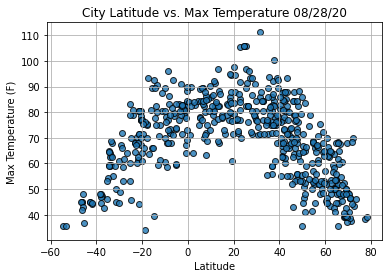

In [27]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

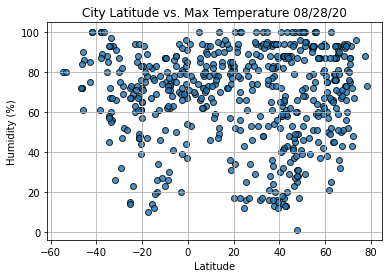

In [35]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

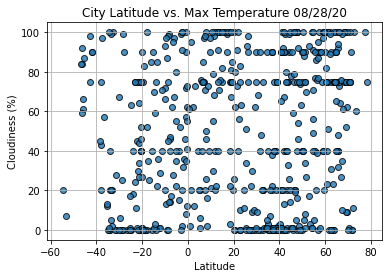

In [32]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

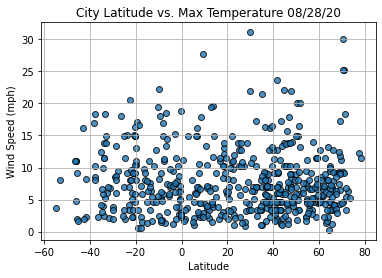

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [36]:
from scipy.stats import linregress


In [37]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [90]:
# Perform a linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: -0.759


In [40]:
regress_values = [(lat * slope + intercept) for lat in lats]


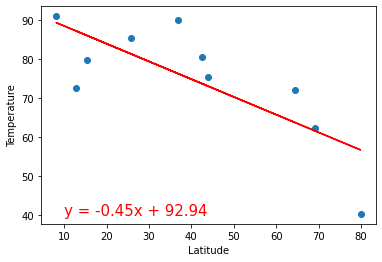

In [42]:
plt.scatter(lats,temps)
plt.plot(lats,regress_values,"r")
plt.xlabel("Latitude")
plt.ylabel('Temperature')
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.show()

In [103]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-value is: {r_value:.3f}")
    plt.show()

In [104]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

The r-value is: -0.715


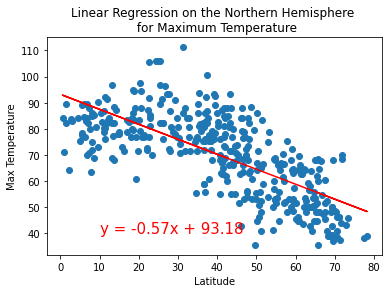

In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Linear Regression on the Northern Hemisphere \n for Maximum Temperature"
y_label = "Max Temperature"
text_coordinates = (10,40)
# Call the function.
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

The r-value is: 0.733


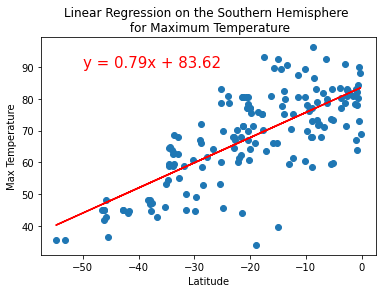

In [106]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = "Linear Regression on the Southern Hemisphere \n for Maximum Temperature"
y_label = "Max Temperature"
text_coordinates = (-50,90)
# Call the function.
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

The r-value is: -0.028


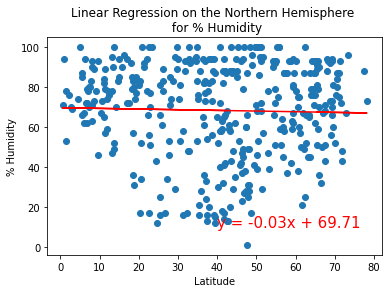

In [107]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
y_label = "% Humidity"
title = "Linear Regression on the Northern Hemisphere \n for % Humidity"
text_coordinates = (40,10)
# Call the function.
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)


The r-value is: -0.156


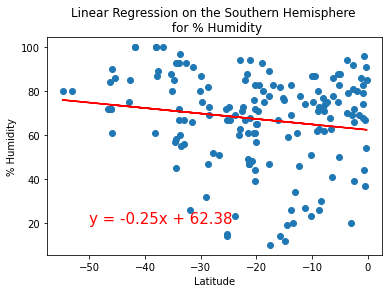

In [108]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
y_label = "% Humidity"
title = "Linear Regression on the Southern Hemisphere \n for % Humidity"
text_coordinates = (-50,20)
# Call the function.
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

The r-value is: 0.086


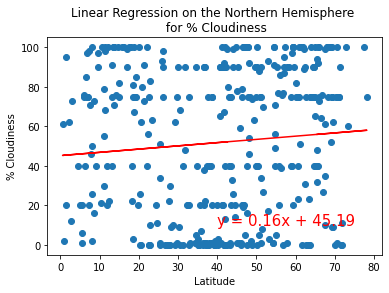

In [109]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
y_label = "% Cloudiness"
title = "Linear Regression on the Northern Hemisphere \n for % Cloudiness"
text_coordinates = (40,10)
# Call the function.
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)


The r-value is: 0.060


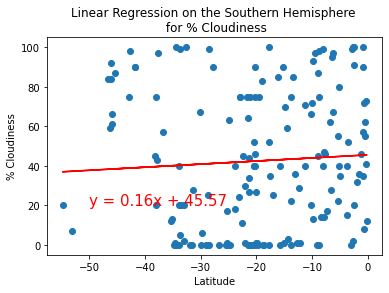

In [111]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
y_label = "% Cloudiness"
title = "Linear Regression on the Southern Hemisphere \n for % Cloudiness"
text_coordinates = (-50,20)
# Call the function.
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

The r-value is: -0.044


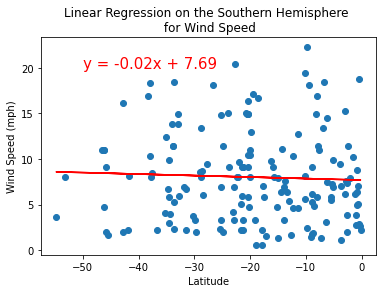

In [114]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
y_label = "Wind Speed (mph)"
title = "Linear Regression on the Southern Hemisphere \n for Wind Speed"
text_coordinates = (-50,20)
# Call the function.
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

The r-value is: 0.086


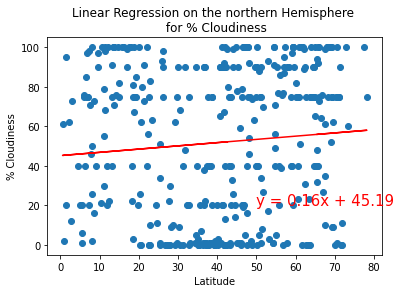

In [115]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
y_label = "% Cloudiness"
title = "Linear Regression on the northern Hemisphere \n for % Cloudiness"
text_coordinates = (50,20)
# Call the function.
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)